# Information content of DNA sequences

Often in the field of bioinformatics a question comes to mind: **What is the shortest (motif) that we expect to appear only once?** or **What is the shortest length that can be uniquely found in the genome?** 

This is important to find out when you are trying to figure out if a DNA sequence of interest is appearing in a genome simply by chance or it is a significant appearance.

Eukaryotic genomes have on the order of L=$10^6−10^{10}$ nucleotides. We can define $l$, an arbitrary length of a motif of interest. We can also begin by saying that the composition of different bases (A, C, G, T) is balanced such that we have equal amounts of each throughout the genome. 

Let's generate a function that generates genomes with predetermined characteristics, so we can test some of these concept empirically:

In [ ]:
def generate_genome(size, g_content, c_content, a_content):

  ''' 
  This function generates a genome of user defined size and GC content.

  Parameters:
    - Number of bases.
    - % of GC content.
  '''

  g_comp = ['G']*g_content
  c_comp = ['C']*c_content
  a_comp = ['A']*a_content
  t_comp = ['T']*(100-(g_content+c_content+a_content))

  human_genome_composition = np.array(g_comp+a_comp+t_comp+c_comp) # making array with target composition
  human_genome = np.random.choice(human_genome_composition, int(size)) # sampling from composition to generate full genome.

  return ''.join(human_genome) # returns dull genome string form

In [ ]:
%pylab inline
from IPython.display import clear_output

Populating the interactive namespace from numpy and matplotlib


In [ ]:
 %%time
 genome = generate_genome(size = 10e6, g_content = 25, c_content = 25, a_content=25)

CPU times: user 2.48 s, sys: 788 ms, total: 3.27 s
Wall time: 3.28 s


In [ ]:
genome[:20]

'AATCGGACATAAGCCGACTA'

In [ ]:
bases , counts =  np.unique(list(genome), return_counts=True)
comps = counts/10e6*100

print("Composition of our mock genome:\n"
        + bases[0]+": " + str(round(comps[0],2)) + " %\n"
        + bases[1]+": " + str(round(comps[1],2)) + " %\n"
        + bases[2]+": " + str(round(comps[2],2)) + " %\n"
        + bases[3]+": " + str(round(comps[3],2)) + " %" )

Composition of our mock genome:
A: 24.98 %
C: 25.03 %
G: 25.0 %
T: 24.99 %


Now we can play with our genome. For instance if we pick our motif to be “A”, it is expected to land in 1/4 of the positions in the genome. ~2.5M times

In [ ]:
genome.count('A')

2498436

If we take a motif of length l=2, for instance “AA” it will match fewer than 1/4, but not much better. ~0.5M times

In [ ]:
s = 'AAAA'

In [ ]:
s.count('AA')

2

In [ ]:
genome.count('AA')

499303

We kindof see a pattern here, the longer the sequence the less it is likely to be found in the genome. Lets try to build an intuition for the information content of a sequence by following a series of thought experiments that we can then validate through code.

First Let's imagine we have a genome with 50% G, 50% C and 0% A or T composition when we sample from it sequentially, we know that we are only going to get Gs and Cs

How **surprised** would we be if the next sample that we took was either a G or a C? not much, right? Because these are the only two possibilitties in this example. If we **expect** a G or a C with a 50% chance we would be equally surprised if we got one or the other.

However, it is hard to say how **surprised** we would be (infinitely?) if the next sample was an A or a T. So it really isn't well defined but that's ok because we are talking about events that can't happen.

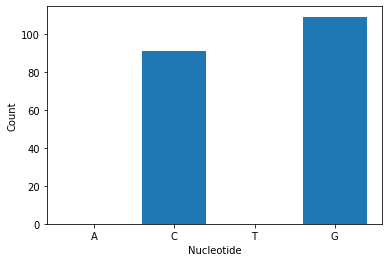

In [ ]:
genome = generate_genome(size = 1000, g_content = 50, c_content = 50, a_content=0) #Make genome size manageable for dynamic plotting.
As = 0
Ts = 0
Gs = 0
Cs = 0

while (As+Ts+Gs+Cs)<=200:
    
    clear_output(wait=True)
    fig,ax = subplots(ncols= 1,nrows =1, sharey = False)
    ax.bar(['A','C','T','G'],[As,Cs,Ts,Gs])
    ax.set_xlabel('Nucleotide')
    ax.set_ylabel('Count')
    sample = np.random.choice(list(genome),1) # making the string genome a list to sample easily

    if sample == 'C':
        Cs += 1
    if sample == 'T':
        Ts += 1
    if sample == 'G':
        Gs += 1
    if sample == 'A':
        As += 1        
    plt.show()

Lets now see what happens if make the genome 90% GC (45 and 45) and 10% AT (5 and 5).

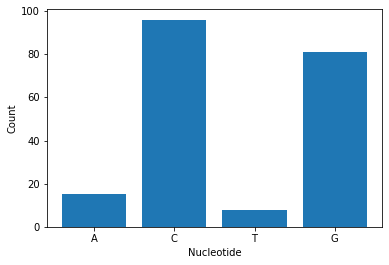

In [ ]:
genome = generate_genome(size = 1000, g_content = 45, c_content = 45, a_content=5) #Make genome size manageable for dynamic plotting.
As = 0
Ts = 0
Gs = 0
Cs = 0

while (As+Ts+Gs+Cs)<=200:
    
    clear_output(wait=True)
    fig,ax = subplots(ncols= 1,nrows =1, sharey = False)
    ax.bar(['A','C','T','G'],[As,Cs,Ts,Gs])
    ax.set_xlabel('Nucleotide')
    ax.set_ylabel('Count')
    sample = np.random.choice(list(genome),1) # making the string genome a list to sample easily

    if sample == 'C':
        Cs += 1
    if sample == 'T':
        Ts += 1
    if sample == 'G':
        Gs += 1
    if sample == 'A':
        As += 1        
    plt.show()

This example basically shows us that **surprise** is inversely related to probability, the more likely an event is to occur the less surprised we'll be if it actually occurs and vice-versa.

In other words and specifically for our example if the probability of sampling an A or an T is low, the **surprise** of sampling either is high. And if the probability of sampling an C or an G is high, the **surprise** of sampling either is low.

A good way to describe this mathematically is by taking the logarithm of the inverse of the probability:

$$\mbox{Surprise}= S = \log{\frac{1}{p(x)}}$$

In that case we could calculate the amount of surpise we'd expect for our genomes, for this last case it would be:

\begin{aligned}
S_{A} &= \log{\frac{1}{p(A)}} = \log{\frac{1}{0.05}} \approx 3 \\
S_{T} &= \log{\frac{1}{p(T)}} = \log{\frac{1}{0.05}} \approx 3 \\
S_{C} &= \log{\frac{1}{p(C)}} = \log{\frac{1}{0.45}} \approx 0.8 \\
S_{G} &= \log{\frac{1}{p(G)}} = \log{\frac{1}{0.45}} \approx 0.8
\end{aligned}

As expected the surprise of sampling a G or a C is smaller than it is for an A or a T.

But what about longer motifs? Let's say we want to know the probability of finding the sequence *GGA*, well then the probability of getting an G $p(G) = 0.45$ and the probability of getting an A $p(A) = 0.05$, so the probability of getting the motif is:

$$p(GGA) = p(G) \times p(G)  \times p(A)  = 0.45 \times 0.45 \times 0.05  \approx 0.01 $$

If we want to know exactly how surprising it would be so observe this particular we can plug this probability in our previous expression for surprise:

$$S_{GGA} = \log{\frac{1}{p(GGA)}} = \log{\frac{1}{0.01}} \approx 4.59$$

But more importantly notice that the total surprise for the motif is the sum of individual surprises (because of the properties of logarithms.)

$$S_{GGA} = \log{\frac{1}{p(G)}} + \log{\frac{1}{p(G)}} + \log{\frac{1}{p(A)}} = \log{1} - (log{G} + log{G} + log{A}) \approx 4.59$$

So far we have been talking about surprise and this must feel familiar after this weeks class. That is because **entropy (E)** is the average **surprise** per event. 

Tying this back to our example, how can we calculate the average entropy of a motif of length $l$? 

Let's first look at the entropy at a single position, which is one base of the possible A, G, C, T. 

$$E_\mbox{position} = \sum_{base \in \{A, G, C, T \} } p(base) \times surprise_{base}$$

Plugging in what we set as the surprise, and simplifying:

$$E_\mbox{position} = -\sum_{base \in \{A, G, C, T \} } p(base) \times \log p(base)$$
Assuming positions are independent of each other, we can use the additivity property of entropy to calculate the entropy of a motif of length $l$:

$$E_\mbox{motif} = l \times E_\mbox{position} = -l \big(\sum_{base \in \{A, G, C, T \} } p(base) \times \log p(base) \big)$$
We've arrived at the formula described by shannon for entropy. What this tells us is the average information content per base position. It turns out there's a very concrete interpretation for this: it measures number of bits in a given message.

#### - But how can we address the original question we had in mind? *(see top of the notebook if you've forgotten already.)*

Let's try to tackle this question using the concept of **Entropy**. And for simplicity we are going to assume from now on that bases in the genome have equal probabilities of occurring along the genome.

The entropy of the location of a motif is going to depend on how many times we can fit the available positions of the genome, for large (or circular) genomes of length $L$ the length of the motif $l$ is usually negligible and we can think of the number of times that we can fit the length of the motif in the genome to be the number of bases in the genome. Let $X$ be a discrete random variable representing the location in a genome of length $L$ (i.e. position 1, 2, ... $L$).

An expression for the entropy of the location in the genome can be written as follows:

$$E_\mbox{location} = -\sum_{i=1}^{L} p(x_i) \log(p(x_i))
$$

Let's assume all locations of the genome are equally likely for the motif, so the probability of finding the motif at any $x_i$ is:

$$p(x_i) = \frac{1}{L}
$$

Plugging this back into the equation we get:

$$E_\mbox{location} = - \log(1/L)
$$

$$E_\mbox{location} = \log(L)
$$

We can also calculate the information content of our motif:

$$E_\mbox{motif} = -l \big(\sum_{base \in \{A, G, C, T \} } p(base) \times \log p(base) \big)$$

Let's assume that A, G, C, T are all equally likely, so we have a $p(A) = p(G) = p(C) = p(T) = 1/4$:


$$\begin{aligned}
E_\mbox{motif} &= -l \big(\sum_{base \in \{A, G, C, T \} } \frac{1}{4} \times \log \frac{1}{4} \big) \\
&= -l \log \frac{1}{4} \\
&= l \log 4 \\
& = 2l \\
\end{aligned}$$

Great, now what we want is to find the $l$ so that the entropy of our motif is at least as large as the entropy of the location:

$$\begin{aligned}
E_\mbox{location} &\leq E_\mbox{motif} \\
\log L &\leq 2l \\
\end{aligned}$$

Thus:
$$ l \geq \frac{1}{2}log(L)
$$

The sequence has to be at least $\frac{1}{2}log(L)$ long for it to be in a genome with equal base composition. We can check this computationally! 

Let's generate genomes of size $10\times10^6$ which means that the minimum sequence length for it to be uniquely found in a genome of that size must be at least 12 bases long (rounding up!). Let's make 10 genomes to sample from. and pick a couple of length 12 motifs to see how many times they come up in the genomes:

In [ ]:
L = 10e6
1/2 * np.log2(L)

11.626748332105768

In [ ]:
%%time
genomes = [generate_genome(size = 10e6, g_content = 25, c_content = 25, a_content=25) for g in range(10)]
motifs_16 = [generate_genome(size=16, g_content = 25, c_content = 25, a_content=25) for g in range(1000)]
motifs_12 = [generate_genome(size=12, g_content = 25, c_content = 25, a_content=25) for g in range(1000)]
motifs_11 = [generate_genome(size=11, g_content = 25, c_content = 25, a_content=25) for g in range(1000)]
motifs_9 = [generate_genome(size=9, g_content = 25, c_content = 25, a_content=25) for g in range(1000)]

CPU times: user 25.3 s, sys: 5.68 s, total: 31 s
Wall time: 30.9 s


In [ ]:
counts_16 = [[genome.count(motif) for motif in np.random.choice(motifs_16,100)] for genome in genomes]
print('100 motifs of length 16 appear, on average ' + str(mean(counts_16)) + u" \u00B1 " + str(round(std(counts_16),2)))

counts_12 = [[genome.count(motif) for motif in np.random.choice(motifs_12,100)] for genome in genomes]
print('100 motifs of length 12 appear, on average ' + str(mean(counts_12)) + u" \u00B1 " + str(round(std(counts_12),2)))

counts_11 = [[genome.count(motif) for motif in np.random.choice(motifs_11,100)] for genome in genomes]
print('100 motifs of length 11 appear, on average ' + str(mean(counts_11)) + u" \u00B1 " + str(round(std(counts_11),2)))

counts_9 = [[genome.count(motif) for motif in np.random.choice(motifs_9,100)] for genome in genomes]
print('100 motifs of length 9 appear, on average ' + str(mean(counts_9)) + u" \u00B1 " + str(round(std(counts_9),2)))



100 motifs of length 16 appear, on average 0.0 ± 0.0
100 motifs of length 12 appear, on average 0.586 ± 0.76
100 motifs of length 11 appear, on average 2.473 ± 1.56
100 motifs of length 9 appear, on average 37.99 ± 6.28
